# PCA, Grupowanie
## PCA - Przykład

In [69]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_validate
import seaborn as sns

from sklearn.cluster import KMeans, AgglomerativeClustering


In [38]:
df = pd.read_csv("wdbc.data")
X = scale(df.drop(columns="diagnosis")) # Dane należy standaryzować
y = df.diagnosis

In [39]:
pca = PCA()
X_pc = pca.fit_transform(X)

Text(0, 0.5, 'Explained variance ratio')

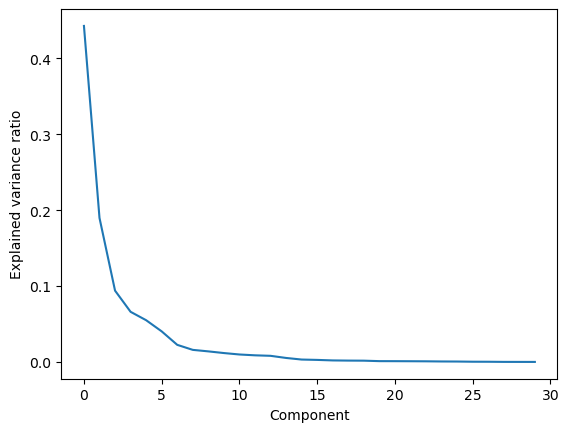

In [40]:
import matplotlib.pyplot as plt
plt.plot(pca.explained_variance_ratio_)
plt.xlabel("Component")
plt.ylabel("Explained variance ratio")

In [41]:
pca = PCA(n_components=5)
X_pc = pca.fit_transform(X)

<Axes: >

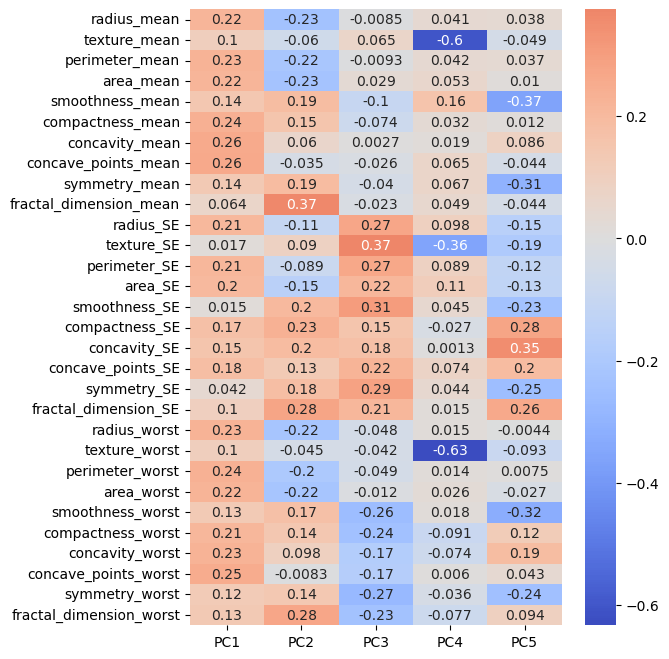

In [42]:
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'], index=df.columns[1:])
plt.figure(figsize=(6,8))
sns.heatmap(loadings, annot=True, center=0.0, cmap='coolwarm')

Text(0, 0.5, 'PC2')

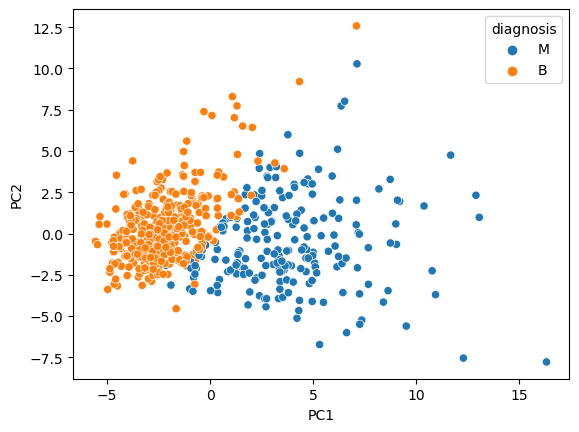

In [43]:
sns.scatterplot(x=X_pc[:, 0], y=X_pc[:, 1], hue=y)
plt.xlabel("PC1")
plt.ylabel("PC2")

In [44]:
lm = LogisticRegression()
cv = pd.DataFrame(cross_validate(lm, X, y))
cv.mean()

fit_time      0.014156
score_time    0.000558
test_score    0.980686
dtype: float64

## Zadania
1. Zbiór MNIST zawiera obrazy odręcznie napisanych cyfr. Każda z 784 kolumn odpowiada jednemu pikselowi obrazu. Użyj PCA do redukcji wymiarowości zbioru i stwórz model klasyfikujący cyfry. Zbiór można wczytać w następujący sposób:

In [45]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784", parser="auto")
X = mnist.data
y = mnist.target
X = scale(X)

In [46]:
pca = PCA()
X_pc = pca.fit_transform(X)

Text(0, 0.5, 'Explained variance ratio')

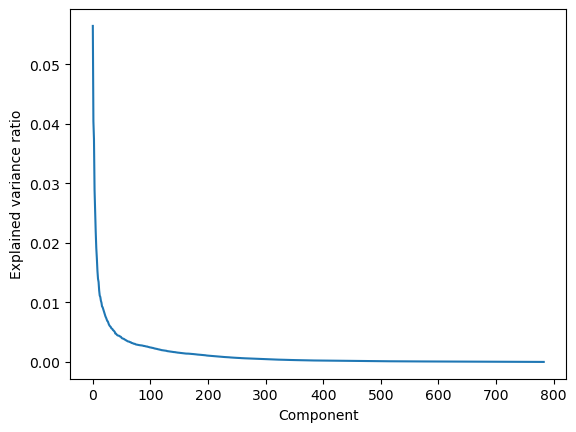

In [47]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel("Component")
plt.ylabel("Explained variance ratio")

<Axes: >

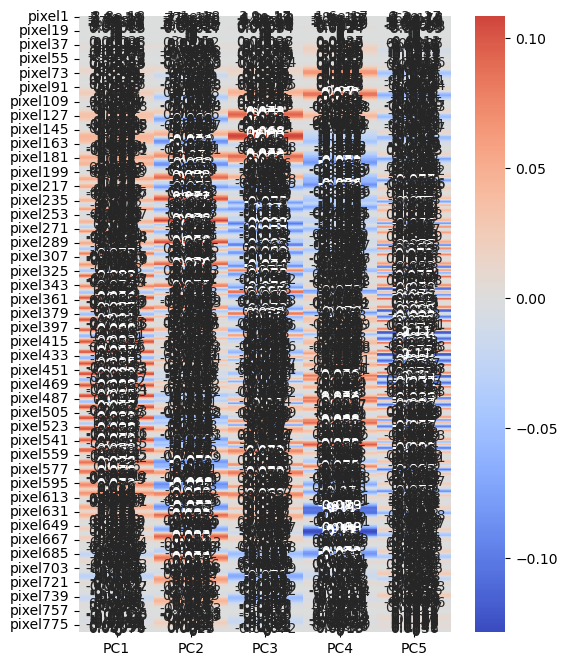

In [48]:
pca = PCA(n_components=5)
X_pc = pca.fit_transform(X)
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'], index=mnist.data.columns) # Za dużo komponentów
plt.figure(figsize=(6,8))
sns.heatmap(loadings, annot=True, center=0.0, cmap='coolwarm')

Text(0, 0.5, 'PC2')

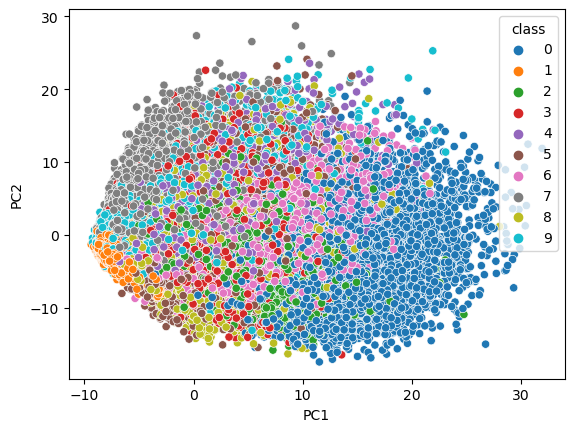

In [49]:
sns.scatterplot(x=X_pc[:, 0], y=X_pc[:, 1], hue=y)
plt.xlabel("PC1")
plt.ylabel("PC2")

In [50]:
lm = LogisticRegression()
cv = pd.DataFrame(cross_validate(lm, X, y))
cv.mean()

c:\Users\micha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\micha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

fit_time      10.281733
score_time     0.054036
test_score     0.915643
dtype: float64

2. Wczytaj zbiór w `housing.csv`. Usuń wiersze zawierające brakujące wartości. Koduj zmienne kategoryczne metodą `get_dummies()`. Skaluj dane.
    - Użyj [`KMeans()`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) do grupowania zbioru.
    - Stwórz wykres zależności WCSS (atrybut `inertia_`) od `n_clusters`. Na podstawie wykresu wybierz odpowiednią liczbę grup.
    - Wizualizuj dane po grupowaniu. Stwórz na przykład wykres punktowy `latitude`/`longitude`, gdzie kolor reprezentuje indeks grupy (dostępny w atrybucie `labels_`) oraz wybrane inne wykresy.
    - Grupuj zbiór przy pomocy [AgglomerativeClustering()](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html). Liczbę grup można regulować parametrem `n_clusters` lub `distance_threshold`. Porównaj wizualnie grupowania stworzone przez k-means i grupowanie aglomeracyjne.


In [51]:
data = pd.read_csv("housing.csv")
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [52]:
data.dropna(inplace=True)
data = pd.get_dummies(data, columns=['ocean_proximity'])
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,False,True,False,False,False
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,False,True,False,False,False
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,False,True,False,False,False
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,False,True,False,False,False


c:\Users\micha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\micha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\micha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\micha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

Text(0.5, 1.0, 'Wykres zależności inercji od liczby sąsiadów')

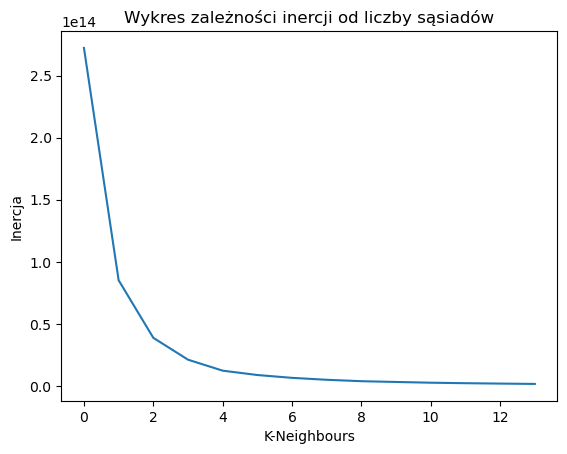

In [53]:
#model = KMeans(n_clusters=5)
#model.fit(data)
#model.inertia_

inertias = [0]
for i in range(1,15):
    model = KMeans(n_clusters=i, random_state=0)
    model.fit(data)
    inertias.append(model.inertia_)

plt.plot(inertias[1:])
plt.xlabel("K-Neighbours")
plt.ylabel("Inercja")
plt.title("Wykres zależności inercji od liczby sąsiadów")

In [67]:
model = KMeans(n_clusters=4, random_state=0)
model.fit(data)


c:\Users\micha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=0)

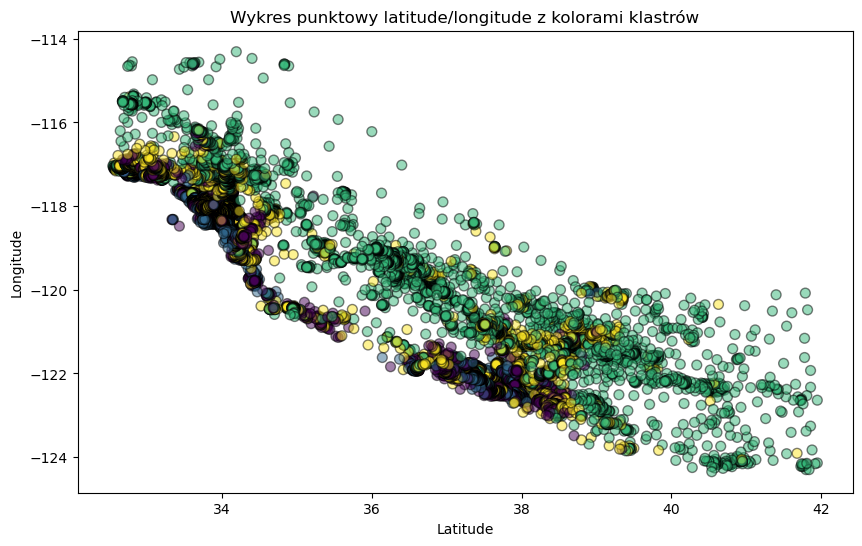

In [68]:
#data['cluster'] = model.fit_predict(data)
plt.figure(figsize=(10, 6))
plt.scatter(data['latitude'], data['longitude'],c=model.labels_ , cmap='viridis', edgecolors='k', s=50, alpha= 0.5)
plt.title('Wykres punktowy latitude/longitude z kolorami klastrów')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

c:\Users\micha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


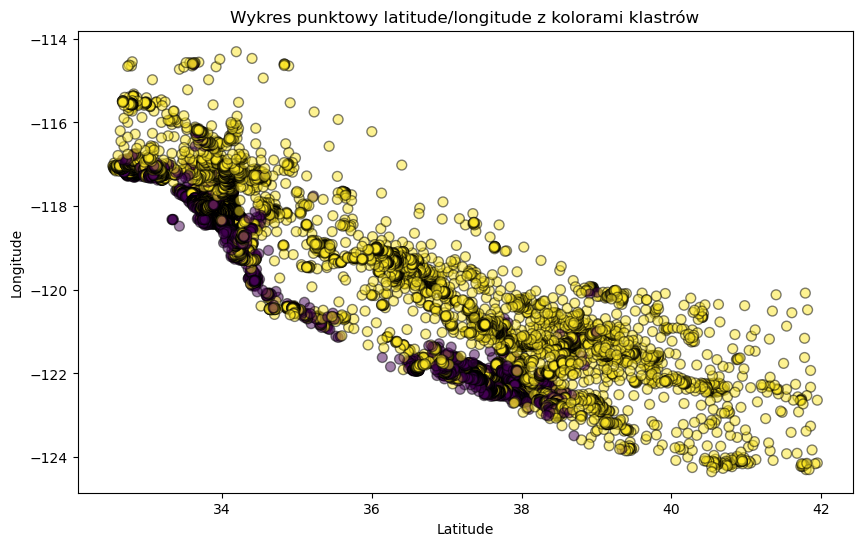

In [74]:
model = KMeans(n_clusters=2, random_state=0)
model.fit(data)

plt.figure(figsize=(10, 6))
plt.scatter(data['latitude'], data['longitude'],c=model.labels_ , cmap='viridis', edgecolors='k', s=50, alpha= 0.5)
plt.title('Wykres punktowy latitude/longitude z kolorami klastrów')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

In [70]:
model_agg = AgglomerativeClustering(n_clusters=4)
model_agg.fit(data)

AgglomerativeClustering(n_clusters=4)

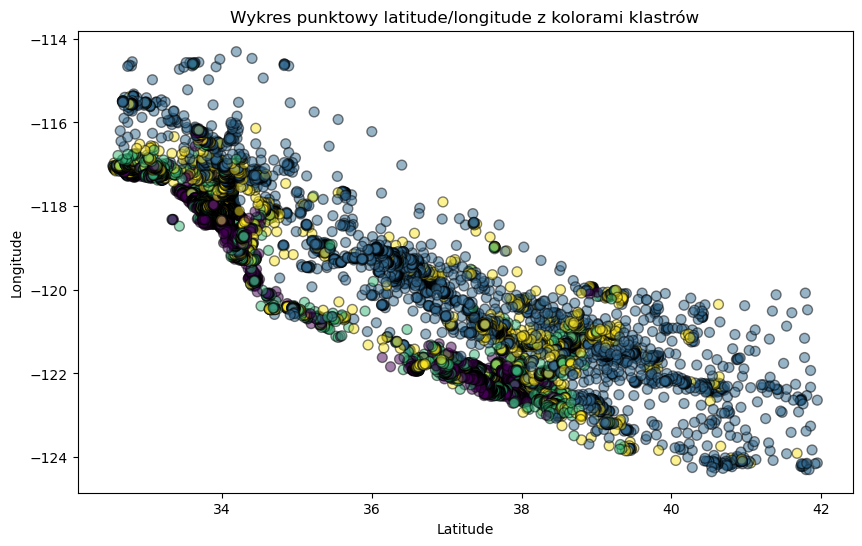

In [71]:
#data['cluster'] = model.fit_predict(data)
plt.figure(figsize=(10, 6))
plt.scatter(data['latitude'], data['longitude'],c=model_agg.labels_ , cmap='viridis', edgecolors='k', s=50, alpha= 0.5)
plt.title('Wykres punktowy latitude/longitude z kolorami klastrów')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

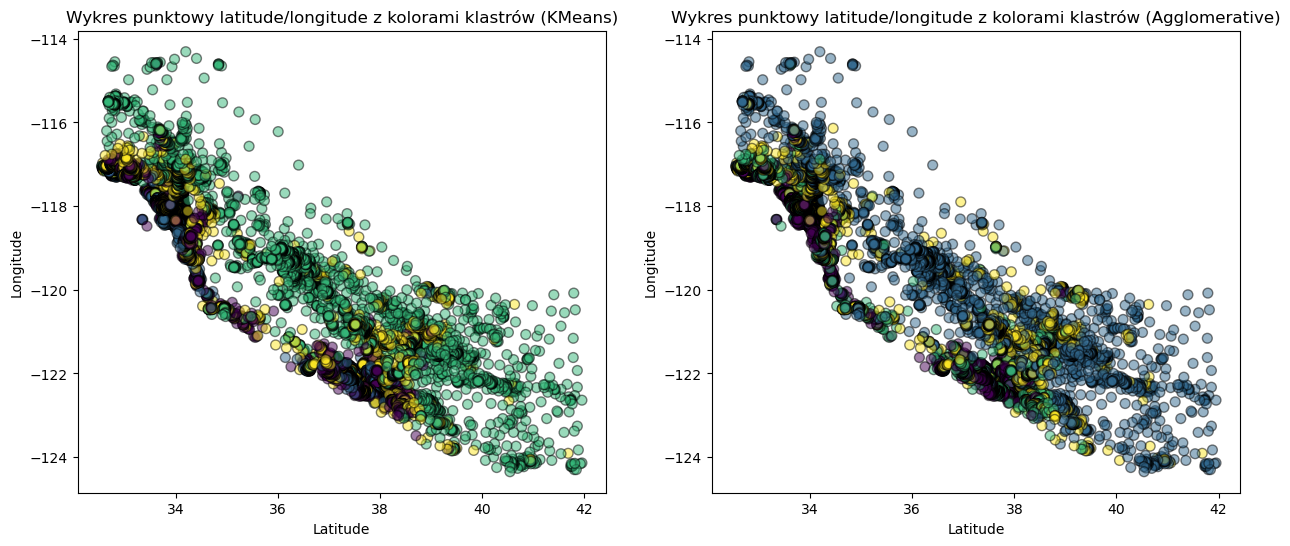

In [72]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Wykres dla modelu KMeans
axs[0].scatter(data['latitude'], data['longitude'], c=model.labels_, cmap='viridis', edgecolors='k', s=50, alpha=0.5)
axs[0].set_title('Wykres punktowy latitude/longitude z kolorami klastrów (KMeans)')
axs[0].set_xlabel('Latitude')
axs[0].set_ylabel('Longitude')

# Wykres dla modelu Agglomerative
axs[1].scatter(data['latitude'], data['longitude'], c=model_agg.labels_, cmap='viridis', edgecolors='k', s=50, alpha=0.5)
axs[1].set_title('Wykres punktowy latitude/longitude z kolorami klastrów (Agglomerative)')
axs[1].set_xlabel('Latitude')
axs[1].set_ylabel('Longitude')

# Wyświetlenie subplotów
plt.show()